# Final Project Report

* Class: DS 5100
* Student Name: Patrick Maloon
* Student Net ID: kvq3jb
* This URL: https://github.com/patty-Git22/DS5100-Project/blob/main/Monte_Carlo/DS51200_FinalProjectTemplate.ipynb

# Instructions

Follow the instructions in the Final Project isntructions notebook and put evidence of your work in this notebook.

Total points for each subsection under **Deliverables** and **Scenarios** are given in parentheses.

Breakdowns of points within subsections are specified within subsection instructions as bulleted lists.

This project is worth **50 points**.

# Deliverables

## The Monte Carlo Module (10)

- URL included, appropriately named (1).
- Includes all three specified classes (3).
- Includes at least all 12 specified methods (6; .5 each).

Put the URL to your GitHub repo here.

Repo URL: https://github.com/patty-Git22/DS5100-Project

Paste a copyy of your module here.

NOTE: Paste as text, not as code. Use triple backticks to wrap your code blocks.

```python
import numpy as np
import pandas as pd

class Die():
    """
    A class representing a die with customizable faces and weights.
    
    The die has N sides ("faces") and W weight. W defaults to 1.0
    for each face, but can be changed after the object is created. 
    Each side has an associated weight that affects the probability
    of rolling a certain side. The faces must be unique and stored in
    a numpy array. 
    
    Attributes:
    sides (numpy.ndarray): Array of unique face values for the die
    die (pandas.DataFrame): DataFrame storing faces as index and their weights

    Methods:
    change_face_weight(face, new_weight): Changes the weight of a specific face
    roll_die(r=1): Rolls the die r times and returns results
    die_state(): Prints current state of die faces and weights
    """
    
    
    def __init__(self, sides):
        """
        Initializes the die with given sides and default weight of 1.0
        for each side.
        
        Parameters:
            sides: numpy.ndarray
                An array of unique face values.
            
        Raises:
            TypeError: If input is not a NumPy array.
            ValueError: If face values are not unique.
        """
        
        self.sides = sides
        # if it is a numpy array#
        if isinstance(sides, np.ndarray):
            # test for uniqueness#
            if len(self.sides) == len(set(self.sides)):
                # set up weights variable#
                weights = np.array([1])
                # make weights same length as sides#
                while len(weights) < len(self.sides):
                    weights = np.append(weights, 1)
                # set up dataframe#
                self.die = pd.DataFrame({'Faces': self.sides, 'Weights': weights})
                self.die.set_index('Faces', inplace=True)
            else:
                raise ValueError('The array has repeated sides')
        else:
            raise TypeError('Sides is not a numpy array')
            
    def change_weight(self, face, new_weight):
        """
        Changes the weight of a specific face on the die.
        
        Parameters:
            face: the face value to modily as long as it exists in the face array.
            new_weight: the new weight assigned to a face (float or int)
            
        Raises:
            IndexError: If the face is not found.
            TypeError: If the weight is not numeric.
            ValueError: If the weight is negative.
        """
        
        if face not in self.sides:
            raise IndexError("Face not found on die")

        try:
            new_weight = float(new_weight)
        except (ValueError, TypeError):
            raise TypeError("The weight must be numeric or castable to float.")

        if new_weight < 0:
            raise ValueError("The weight must be non-negative.")

        self.die.loc[face, 'Weight'] = new_weight
        
    def roll_die(self, n=1):
        """
        Rolls the die one or more times.
        
        Parameters:
            n: int, optional
                number of times to roll the die (default is 1 roll).
            
        Returns:
            list: Outcome of the die rolls based on face weight.
        
        """
        probs = self.die['Weights'] / self.die['Weights'].sum()
        die_roll = list(np.random.choice(self.die.index, size=r, p=probs))
        return die_roll
    
    def show_die(self):
        """
        Shows the current state for the die.
        
        Returns:
            DataFrame showing the faces and corresponding weights.
        
        """
        
        print(self.die)
        
        
        
class Game():
    """
    A class to simulate rolling one or more similar die objects one or more times.
    
    Each die must have the same number of sides and faces, but can have different weights.
    Each game is initialized with a Python list that contains one or more dice.
    Game objects have a behavior to play a game, i.e. to roll all of the dice a given number of times.
    Game objects only keep the results of their most recent play.
    
    Attributes:
        dice (list): A list of Die objects to be used in the game
        results (DataFrame): A DataFrame containing the results of the dice rolls, where each column represents a die and each row represents a roll

    Methods:
        play(n_rolls): Rolls all dice n_rolls times and stores results
        show(form): Returns the results in either 'wide' or 'narrow' format
    """
    
            
    def __init__(self, dice):
        """
        Initialize a new dice game.

        Parameters:
            dice : list
                 A list of Die objects to be used in the game.

        Returns:
            None
            
        """

        self.dice = dice
        self.results = None
        
    def play(self, n_rolls):
        """
        Rolls all dice a given number of time and records the results.
        
        Parameters
            n_rolls: int
                The number of times to roll all the dice.
            
        Returns:
            None: Results are stored in a private data frame.
            
        """
        
        results = {f'die_{i}': Die.roll_die(n_rolls)
                   for i, Die in enumerate(self.dice, 1)}
        self.results = pd.DataFrame(results, index=[f'roll_{i + 1}' for i in range(n_rolls)])
        
    def show(self, form = 'wide'):
        """
        Returns a copy of the private play data frame to the user.
        
        Parameters:
            form : str, optional
                Format of the results, either 'wide' or 'narrow' (default is 'wide')
                    - 'wide': Each die roll is a column
                    - 'narrow': Results are melted into a long format with die number and outcome columns

        Returns:
            pandas.DataFrame
                DataFrame containing the results in the specified format

        Raises:
            ValueError
                If no games have been played or if form is not 'wide' or 'narrow'
                
        """
        if self.results is None:
            raise ValueError("No games have been played yet")

        if form.lower() not in ['wide', 'narrow']:
            raise ValueError("Form must be 'wide' or 'narrow'")

        if form.lower() == 'wide':
            return self.results
        else:
            return self.results.melt(ignore_index=False, var_name='die', value_name='outcome').set_index('die', append=True)

class Analyzer:
    """
    A class to anlayze the results of single game and computes various descriptive statistical properties about it.
    
    Provides methods to compute jackpots, face counts, combinations, and permutations of rolled dice. 
    

    Methods:
        jackpot(): Returns the number of rolls that resulted in all dice showing the same face
        face_counts(): Returns a DataFrame showing the count of each face value per roll
        combo_count(): Returns counts of unique combinations of faces (order doesn't matter)
        permu_count(): Returns counts of unique permutations of faces (order matters)
        
    """    
    
    def __init__(self, game):
        """
        Initializes the analyzer with a game object.
        
        Parameters:
            Game: A  Game objec that has been played.
            
        Raises:
            ValueError: If the passed value is not a Game object.
            
        """
        
        if not isinstance(game, Game):
            raise ValueError("Input must be a Game object.")
            
        self.game = game
        
    def jackpot(self):
        """
        Counts the number of rolls that resulted in Jackpot (all faces are the same).
        
        Returns:
            int: Number of Jackpots.
            
        """
        
        outcome = self.game.show()
        return sum(outcome.nunique(axis=1) == 1)
    
    def face_counts(self):
        """
        Computes how many times each face appears in each roll.
        
        Returns:
            DataFrame: Index of roll numbers, face values as columns, and values show count of each face in that roll. 
            
        """
        
        outcome = self.game.show()
        faces = pd.unique(outcome.values.ravel())
        counts = pd.DataFrame(index=outcome.index, columns=faces)
        for face in faces:
            counts[face] = (outcome == face).sum(axis=1)
        return counts
        
    def combo_count(self):
        """
        Computes distinct combinations of faces rolled and their counts.
        Combos are order-independent and may contain repetitions.
        
        Returns:
            DataFrame: MultiIndex shows distinct combos with a column to count occurrences.
        
        """
        
        outcome = self.game.show()
        combos = outcome.apply(lambda x: tuple(sorted(x.values)),axis=1)
        return pd.DataFrame(combos.value_counts(), columns=['count'])
    
    def perm_count(self):
        """
        Computes distinct permutations of rolled faces and their frequencies.
        Permutations are order-dependent and may contain repetitions. 
        
        Returns:
            DataFrame: MultiIndex shows distinct permutations with columns showing count of occurrences.
            
        """
        
        outcome = self.game.show()
        perms = outcome.apply(lambda x: tuple(x.values), axis=1)
        return pd.DataFrame(perms.value_counts(), columns=['count'])

```

## Unitest Module (2)

Paste a copy of your test module below.

NOTE: Paste as text, not as code. Use triple backticks to wrap your code blocks.

- All methods have at least one test method (1).
- Each method employs one of Unittest's Assert methods (1).

```python
import unittest
import numpy as np
import pandas as pd
from MC_Sim import Die, Game, Analyzer

class TestDie(unittest.TestCase):

    def setUp(self):
        self.faces = np.array([1, 2, 3, 4, 5, 6])
        self.die = Die(self.faces)

    def test_change_weight(self):
        self.die.change_weight(1, 3.0)
        self.assertEqual(self.die.die.loc[1, 'Weight'], 3.0)

    def test_roll_die(self):
        result = self.die.roll_die(10)
        self.assertEqual(len(result), 10)
        self.assertTrue(all(face in self.faces for face in result))

    def test_show_die(self):
        df = self.die.show_die()
        self.assertIsInstance(df, pd.DataFrame)
        self.assertTrue('Weight' in df.columns)


class TestGame(unittest.TestCase):

    def setUp(self):
        die1 = Die(np.array([1, 2, 3]))
        die2 = Die(np.array([1, 2, 3]))
        self.game = Game([die1, die2])

    def test_play(self):
        self.game.play(5)
        self.assertIsInstance(self.game.results, pd.DataFrame)
        self.assertEqual(self.game.results.shape[0], 5)
        self.assertEqual(self.game.results.shape[1], 2)

    def test_show_wide(self):
        self.game.play(5)
        result = self.game.show('wide')
        self.assertIsInstance(result, pd.DataFrame)
        self.assertEqual(result.shape, self.game.results.shape)

    def test_show_narrow(self):
        self.game.play(5)
        result = self.game.show('narrow')
        self.assertIsInstance(result, pd.DataFrame)
        self.assertIn('outcome', result.columns)


class TestAnalyzer(unittest.TestCase):

    def setUp(self):
        die1 = Die(np.array([1, 2, 3]))
        die2 = Die(np.array([1, 2, 3]))
        game = Game([die1, die2])
        game.play(10)
        self.analyzer = Analyzer(game)

    def test_jackpot(self):
        jackpots = self.analyzer.jackpot()
        self.assertIsInstance(jackpots, int)

    def test_face_counts(self):
        counts = self.analyzer.face_counts()
        self.assertIsInstance(counts, pd.DataFrame)

    def test_combo_count(self):
        combos = self.analyzer.combo_count()
        self.assertIsInstance(combos, pd.DataFrame)
        self.assertIn('count', combos.columns)

    def test_perm_count(self):
        perms = self.analyzer.perm_count()
        self.assertIsInstance(perms, pd.DataFrame)
        self.assertIn('count', perms.columns)


if __name__ == '__main__':
    unittest.main()
```

## Unittest Results (3)

Put a copy of the results of running your tests from the command line here.

Again, paste as text using triple backticks.

- All 12 specified methods return OK (3; .25 each).

```python
bash-4.4$python -m unittest MC_Sim_test
..........
----------------------------------------------------------------------
Ran 10 tests in 0.023s

OK
```

## Import (1)

Import your module here. This import should refer to the code in your package directory.

- Module successuflly imported (1).

In [1]:
from MC_Sim import Die, Game, Analyzer

## Help Docs (4)

Show your docstring documentation by applying `help()` to your imported module.

- All methods have a docstring (3; .25 each).
- All classes have a docstring (1; .33 each).

In [2]:
help(Die)
help(Game)
help(Analyzer)

Help on class Die in module MC_Sim:

class Die(builtins.object)
 |  Die(sides)
 |  
 |  A class representing a die with customizable faces and weights.
 |  
 |  The die has N sides ("faces") and W weight. W defaults to 1.0
 |  for each face, but can be changed after the object is created. 
 |  Each side has an associated weight that affects the probability
 |  of rolling a certain side. The faces must be unique and stored in
 |  a numpy array. 
 |  
 |  Attributes:
 |  sides (numpy.ndarray): Array of unique face values for the die
 |  die (pandas.DataFrame): DataFrame storing faces as index and their weights
 |  
 |  Methods:
 |  change_face_weight(face, new_weight): Changes the weight of a specific face
 |  roll_die(r=1): Rolls the die r times and returns results
 |  die_state(): Prints current state of die faces and weights
 |  
 |  Methods defined here:
 |  
 |  __init__(self, sides)
 |      Initializes the die with given sides and default weight of 1.0
 |      for each side.
 |    

## `README.md` File (3)

Provide link to the README.md file of your project's repo.

- Metadata section or info present (1).
- Synopsis section showing how each class is called (1). (All must be included.)
- API section listing all classes and methods (1). (All must be included.)

URL: https://github.com/patty-Git22/DS5100-Project/blob/main/README.md

## Successful installation (2)

Put a screenshot or paste a copy of a terminal session where you successfully install your module with pip.

If pasting text, use a preformatted text block to show the results.

- Installed with `pip` (1).
- Successfully installed message appears (1).

```python
bash-4.4$pip install .
Defaulting to user installation because normal site-packages is not writeable
Processing /sfs/gpfs/tardis/home/kvq3jb/Documents/MSDS/DS5100/DS5100-kvq3jb/DS5100-Project
  Preparing metadata (setup.py) ... done
Building wheels for collected packages: MC-Sim.py
  Building wheel for MC-Sim.py (setup.py) ... done
  Created wheel for MC-Sim.py: filename=MC_Sim.py-0.1-py3-none-any.whl size=6881 sha256=d66d58d3c52bd0933f684fb2e4cb26f76ea92be76f2f0395bc2e548ae21da331
  Stored in directory: /sfs/gpfs/tardis/home/kvq3jb/.cache/pip/wheels/a9/26/66/5b7c47281fa2019b859f55edd0d7c23ed409a394dfadd29b08
Successfully built MC-Sim.py
Installing collected packages: MC-Sim.py
  Attempting uninstall: MC-Sim.py
    Found existing installation: MC-Sim.py 0.1
    Uninstalling MC-Sim.py-0.1:
      Successfully uninstalled MC-Sim.py-0.1
Successfully installed MC-Sim.py-0.1
```

# Scenarios

Use code blocks to perform the tasks for each scenario.

Be sure the outputs are visible before submitting.

## Scenario 1: A 2-headed Coin (9)

Task 1. Create a fair coin (with faces $H$ and $T$) and one unfair coin in which one of the faces has a weight of $5$ and the others $1$.

- Fair coin created (1).
- Unfair coin created with weight as specified (1).

In [3]:
import numpy as np
import pandas as pd

fair_coin = Die(np.array(['H', 'T']))
unfair_coin = Die(np.array(['H', 'T']))
unfair_coin.change_weight('H', 5.0)
unfair_coin.show_die()

,Weight
Faces,
H,5
T,1


Task 2. Play a game of $1000$ flips with two fair dice.

- Play method called correclty and without error (1).

In [4]:
game_fair = Game([fair_coin, fair_coin])
game_fair.play(1000)
game_fair.show()

,die_0,die_1
roll_1,T,H
roll_2,H,T
roll_3,T,T
roll_4,H,T
roll_5,H,H
...,...,...
roll_996,T,T
roll_997,T,T
roll_998,T,H
roll_999,T,H


Task 3. Play another game (using a new Game object) of $1000$ flips, this time using two unfair dice and one fair die. For the second unfair die, you can use the same die object twice in the list of dice you pass to the Game object.

- New game object created (1).
- Play method called correclty and without error (1).

In [5]:
game_new = Game([unfair_coin, unfair_coin, fair_coin])
game_new.play(1000)
game_new.show()

,die_0,die_1,die_2
roll_1,T,H,H
roll_2,T,H,T
roll_3,H,H,H
roll_4,T,H,T
roll_5,H,H,T
...,...,...,...
roll_996,H,H,H
roll_997,H,H,H
roll_998,H,H,H
roll_999,H,T,T


Task 4. For each game, use an Analyzer object to determine the raw frequency of jackpots — i.e. getting either all $H$s or all $T$s.

- Analyzer objecs instantiated for both games (1).
- Raw frequencies reported for both (1).

In [6]:
analyzer_fair = Analyzer(game_fair)
analyzer_mixed = Analyzer(game_new)
fair_jackpot = analyzer_fair.jackpot()
fair_jackpot

509

In [7]:
unfair_jackpot = analyzer_mixed.jackpot()
unfair_jackpot

381

Task 5. For each analyzer, compute relative frequency as the number of jackpots over the total number of rolls.

- Both relative frequencies computed (1).

In [8]:
jackpots_fair_freq = fair_jackpot/1000
jackpots_mixed_freq = unfair_jackpot/1000

Task 6. Show your results, comparing the two relative frequencies, in a simple bar chart.

- Bar chart plotted and correct (1).

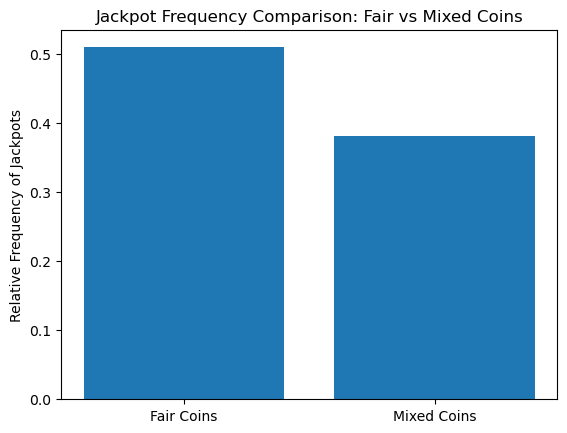

In [9]:
import matplotlib.pyplot as plt

plt.bar(['Fair Coins', 'Mixed Coins'], [jackpots_fair_freq, jackpots_mixed_freq])
plt.ylabel('Relative Frequency of Jackpots')
plt.title('Jackpot Frequency Comparison: Fair vs Mixed Coins')
plt.show()


## Scenario 2: A 6-sided Die (9)

Task 1. Create three dice, each with six sides having the faces 1 through 6.

- Three die objects created (1).

In [10]:
d1 = Die(np.array([1, 2, 3, 4, 5, 6]))
d2 = Die(np.array([1, 2, 3, 4, 5, 6]))
d3 = Die(np.array([1, 2, 3, 4, 5, 6]))

Task 2. Convert one of the dice to an unfair one by weighting the face $6$ five times more than the other weights (i.e. it has weight of 5 and the others a weight of 1 each).

- Unfair die created with proper call to weight change method (1).

In [11]:
d2.change_weight(6,5)
d2.show_die()

,Weight
Faces,
1,1
2,1
3,1
4,1
5,1
6,5


Task 3. Convert another of the dice to be unfair by weighting the face $1$ five times more than the others.

- Unfair die created with proper call to weight change method (1).

In [12]:
d1.change_weight(1,5)
d1.show_die()

,Weight
Faces,
1,5
2,1
3,1
4,1
5,1
6,1


Task 4. Play a game of $10000$ rolls with $5$ fair dice.

- Game class properly instantiated (1). 
- Play method called properly (1).

In [13]:
game = Game([d3,d3,d3,d3,d3])
game.play(10000)
game.show()

,die_0,die_1,die_2,die_3,die_4
roll_1,5,4,1,3,6
roll_2,5,1,3,1,5
roll_3,6,2,4,6,6
roll_4,6,3,2,6,4
roll_5,4,2,4,5,4
...,...,...,...,...,...
roll_9996,5,2,6,3,5
roll_9997,3,1,3,4,1
roll_9998,5,3,5,5,3
roll_9999,6,1,2,1,4


Task 5. Play another game of $10000$ rolls, this time with $2$ unfair dice, one as defined in steps #2 and #3 respectively, and $3$ fair dice.

- Game class properly instantiated (1). 
- Play method called properly (1).

In [14]:
game2_0 = Game([d3,d3,d3,d1,d2])
game2_0.play(10000)
game2_0.show()

,die_0,die_1,die_2,die_3,die_4
roll_1,3,1,1,2,6
roll_2,6,5,6,5,6
roll_3,1,2,5,1,5
roll_4,3,2,6,5,4
roll_5,6,4,5,1,3
...,...,...,...,...,...
roll_9996,1,2,5,3,6
roll_9997,2,4,1,5,6
roll_9998,1,5,6,5,2
roll_9999,4,6,1,3,3


Task 6. For each game, use an Analyzer object to determine the relative frequency of jackpots and show your results, comparing the two relative frequencies, in a simple bar chart.

- Jackpot methods called (1).
- Graph produced (1).

In [15]:
gameanalyze = Analyzer(game)
gameanalyze2 = Analyzer(game2_0)
gamefreq = gameanalyze.jackpot()/10000
game2_0freq = gameanalyze2.jackpot()/10000
gamefreq, game2_0freq

(0.001, 0.0004)

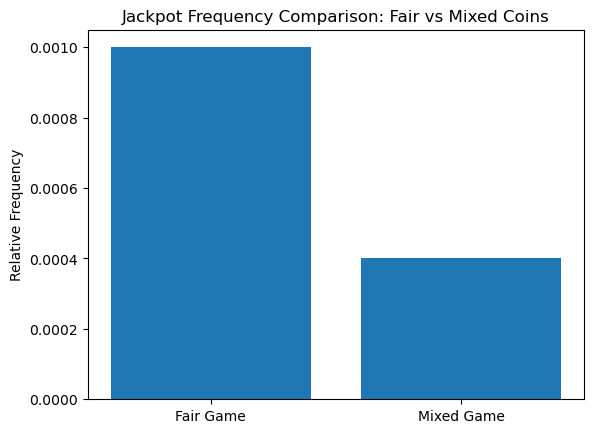

In [16]:
plt.bar(['Fair Game', 'Mixed Game'], [gamefreq, game2_0freq])
plt.ylabel('Relative Frequency')
plt.title('Jackpot Frequency Comparison: Fair vs Mixed Coins')
plt.show()

## Scenario 3: Letters of the Alphabet (7)

Task 1. Create a "die" of letters from $A$ to $Z$ with weights based on their frequency of usage as found in the data file `english_letters.txt`. Use the frequencies (i.e. raw counts) as weights.

- Die correctly instantiated with source file data (1).
- Weights properly applied using weight setting method (1).

In [17]:
eng_letters = pd.read_csv("english_letters.txt", sep = ' ', header = None)
die_letters = Die(np.array(list(eng_letters[0])))
for letter in eng_letters.index:
        die_letters.change_weight(eng_letters[0][letter], eng_letters[1][letter])
        
die_letters.show_die()

,Weight
Faces,
E,529117365
T,390965105
A,374061888
O,326627740
I,320410057
N,313720540
S,294300210
R,277000841
H,216768975


Task 2. Play a game involving $4$ of these dice with $1000$ rolls.

- Game play method properly called (1).

In [18]:
game3 = Game([die_letters,die_letters,die_letters,die_letters])
game3.play(1000)
game3.show()

,die_0,die_1,die_2,die_3
roll_1,O,O,S,A
roll_2,Y,G,I,F
roll_3,Y,R,S,H
roll_4,T,O,I,E
roll_5,R,R,R,I
...,...,...,...,...
roll_996,B,L,I,N
roll_997,O,T,I,A
roll_998,B,H,I,A
roll_999,T,W,R,I


Task 3. Determine how many permutations in your results are actual English words, based on the vocabulary found in `scrabble_words.txt`.

- Use permutation method (1).
- Get count as difference between permutations and vocabulary (1).

In [19]:
words = pd.read_csv("scrabble_words.txt", header = None)
word = set(words[0])
game3analyze = Analyzer(game3)
perm = game3analyze.perm_count()
perm1 = perm.index.map(lambda x: ''.join(x))
word_match = perm1[perm1.isin(word)]
len(word_match)

56

Task 4. Repeat steps #2 and #3, this time with $5$ dice. How many actual words does this produce? Which produces more?

- Successfully repreats steps (1).
- Identifies parameter with most found words (1).

In [20]:
game4 = Game([die_letters,die_letters,die_letters,die_letters,die_letters])
game4.play(1000)
game4analyze = Analyzer(game4)
perm2 = game4analyze.perm_count()
perms = perm2.index.map(lambda x: ''.join(x))
word_match2 = perms[perms.isin(word)]
len(word_match2)

11

There are 42 more words in game 3 tha game 4